><div class="alert alert-block alert-info">
><p><b>2.</b></p>
><p>Implementar LDA sobre la base MNIST. Usar digitos 1 y 3</p>
</div>

*Me disculpo por la falta de acentos, pero mi teclado es 40%

Para este ejercicio utilizaremos las siguientes librerias:
* numpy: para trabajar con vectores y matrices
* sklearn: para cargar una versión simplificada de MNIST, dividir los datos en train y test, y para utilizar su fucion precargada de LDA.
* matplotlib: para visualizar los resultados

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Cargamos la base de datos con "datasets" de sklearn (en este caso load_digits) y filtramos los digitos que no sean 1 o 3. Despues dividimos los datos en conjuntos de entrenamiento y prueba con "train_test_split()"

In [6]:
# cargamos la base
datos = datasets.load_digits()

# filtramos los 1 y 3
x = datos.data[np.logical_or(datos.target == 1, datos.target == 3)]
y = datos.target[np.logical_or(datos.target == 1, datos.target == 3)]

# dividimos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

Ya con ambos conjuntos podemos crear una nueva instancia de LDA con la funcion integrada de sklearn. Para esto utilizamos la funcion "fit()", para entrenar el modelo en nuestro conjunto de entrenamiento. 
Podemos utilizar la funcion "predict()" para predecir las etiquetas para nuestro conjunto test y despues usar "accuracy_score" para comparar las etiquetas verdaderas "y_test" con nuestras predicciones "y_pred" y ver con que tanta precision predice el modelo. Luego, con "conf_matrix" podremos ver la matriz de confusion que nos permitira ver a cuantas etiquetas le atinamos y en cuantas nos equivocamos.

In [7]:
# creamos la instancia de lda
lda = LDA()

# la entreamos en nuestro conjunto train
lda.fit(x_train, y_train)

# funcion para predecir las etiquetas
y_pred = lda.predict(x_test)

# calculamos que tan bien predecimos
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.994535519125683
Confusion Matrix:
[[85  0]
 [ 1 97]]


Tambien, ya como extra, la funcion lda de sklearn nos permite obtener los coeficientes del lda, que nos puedxen ayudar a ver qué píxeles son importantes para distinguir entre del digito 1 y el 3. Mostrar los coeficientes no da tanta intuicion, por eso mejor los visualizamos utilizando matplotlib

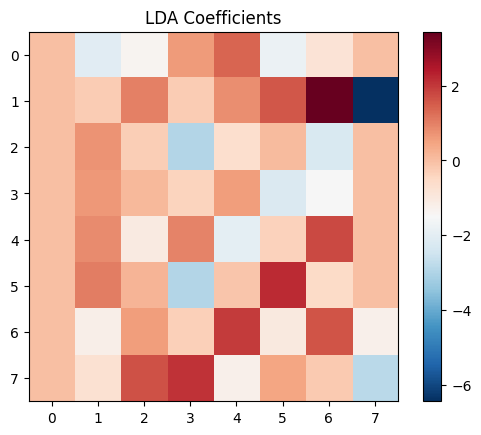

In [5]:
# coeficientes del lda
coef = lda.coef_.reshape(8, 8)
plt.imshow(coef, cmap=plt.cm.RdBu_r)
plt.title('LDA Coefficients')
plt.colorbar()
plt.show()

><div class="alert alert-block alert-info">
><p><b>8.</b></p>
><p>Implemente SL, AL, CL y divisive para los datos de iris, interprete</p>
</div>

Analogo al ejercicio pasado, utilizaremos sklearn para cargar la base de datos iris ("load_iris") y para realizar el clustering.

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Primero cargamos la base y la almacenamos en una variable. 

In [12]:
iris = load_iris()
x = iris.data

En una lista almacenamos que metodos de agrupamiento se quieren utilizar, en este caso SL, AL y CL (por el momento no divisivo)

In [13]:
metodos_agrupamiento = ['single', 'average', 'complete']

Creamos una funcion que reciba el metodo de clustering que se desee y usamos "linkage" de sklearn con el conjunto de datos iris para crear una  matriz que contenga la información sobre el orden y las distancias de las fusiones en el proceso de clustering. Usamos luego esta matriz con la funcion "dendogram" para crear el dondograma.

In [21]:
# Función para plotear el dendrograma
def dendograma(model):
    # matriz del dendograma
    m = linkage(x, method=model)

    # plotear el dendrograma
    dendrogram(m)

Recorremos cada valor de la lista de metodos de clustering e incializamos la funcion AgglomerativeClustering de sklearn con el numero de clusters que queremos (3), la metrica a utilizar (euclidiana) y el metodo de clustering. Luego entrenamos el modelo de clustering con nuestros datos iris usando la funcion 'fit. Ya despues usamos la funcion de arriba para plotear el dendograma


Método de clustering: single
Etiquetas de cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


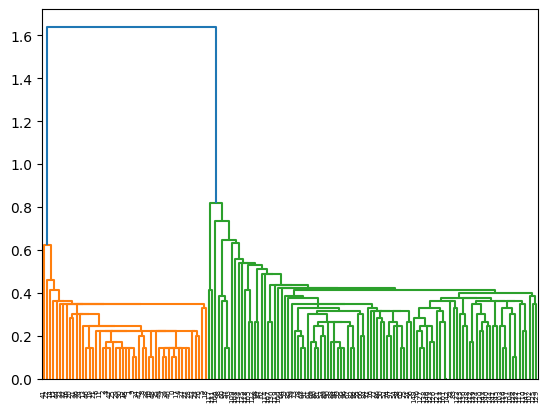


Método de clustering: average
Etiquetas de cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


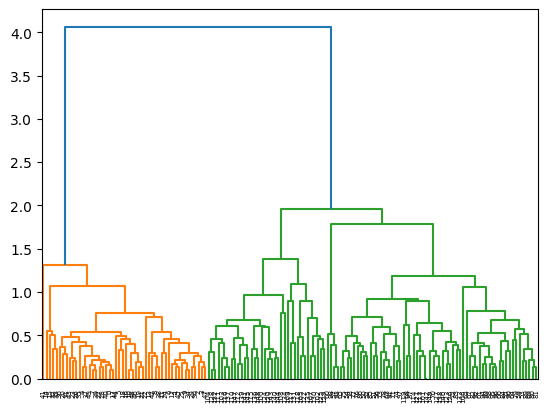


Método de clustering: complete
Etiquetas de cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


c:\Users\lebue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


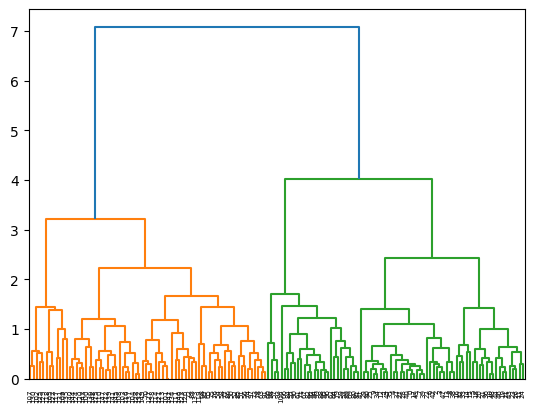

In [23]:
# Recorremos cada metodo
for link_method in metodos_agrupamiento:
    print(f"\nMétodo de clustering: {link_method}")

    # inicializamos la funcion de sklearn 
    cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=link_method)
    
    # entrenamos el modelo con los datos iris
    cluster.fit(x)
    
    # aplicamos la funcion de arriba para plotear los datos
    print(f"Etiquetas de cluster: {cluster.labels_}")
    plt.figure()
    dendograma(link_method)
    plt.show()

Lamentablemente sklearn no tiene el metodo de agrupamiento divisivo, pero podemos usar scipy "linkage" para utilizarlo y la funcion sera muy similar a la de arriba.

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Utilizamos los mismos datos x que son de la base datos iris y usaremos 'ward', que
# segun varias referencias, es un método que intenta minimizar la varianza en cada cluster y 
# se podría considerar como un tipo de método divisivo.
divisivo = linkage(x, method='ward')

La funcion recibe una matriz de clustering, que al igual que arriba es una matriz con el orden y las distancias de las fusiones, y como la funcion dendogram de scipy requiere etiquetas, tambien nuestra funcion recibe etiquetas, pero por el momento no nos interesa entonces le pondremos "none". La funcion utiliza "dendrogram" para dibujar el dendrograma basado en la matriz de clustering.

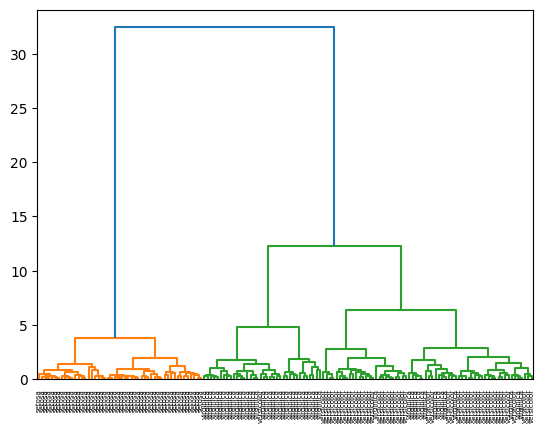

In [28]:
# Función para plotear el dendrograma
def dendograma_divisivo(divisivo, labels=None):
    # Plotear el dendrograma
    dendrogram(divisivo, labels=labels, leaf_rotation=90.)
    plt.show()

# Crear etiquetas desde los datos originales
etiquetas = iris.target_names[iris.target]

# Plotear el dendrograma
dendograma_divisivo(divisivo, etiquetas)

><div class="alert alert-block alert-info">
><p><b>10.</b></p>
</div>

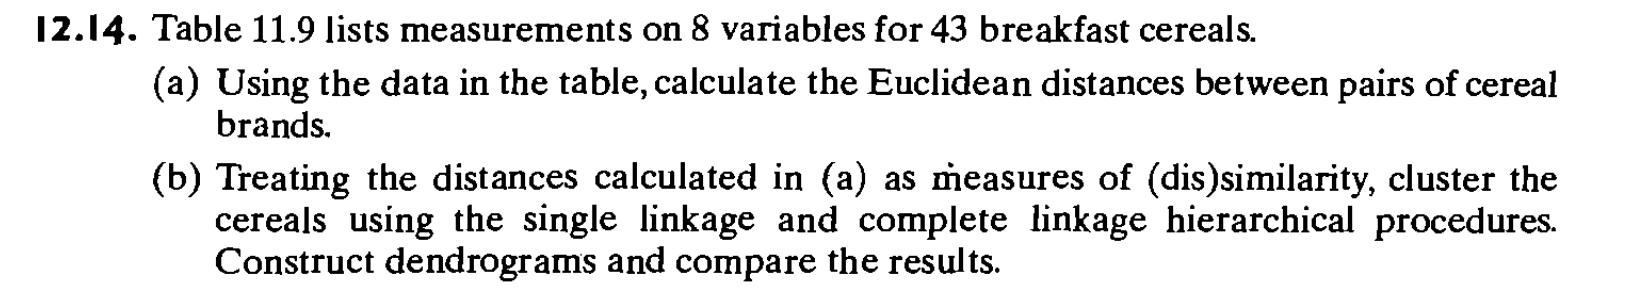

In [1]:
from IPython.display import Image
Image(filename='C:/Users/lebue/OneDrive/Documentos/ITAM/8vo/Aplicada 3/ola1.png')